# Problem Statement

ECG of different age groups of people has been recorded. The survival time in hours after the operation is given and the event type is denoted by 1 (if dead) and 0 (if alive). Perform survival analysis on the dataset given below and provide your insights in the documentation. 

Lets load our libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (12,12)
plt.style.use('ggplot')

In [3]:
data = pd.read_excel('ECG_Surv.xlsx')
data.shape

(133, 12)

We have 133 rows and 12 columns, lets explore our dataset

In [4]:
data.head()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,name,group
0,11.0,0,71,0,0.260,9.000,4.600,14.0,1.00,1.000,name,1
1,19.0,0,72,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1
2,16.0,0,55,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1
3,57.0,0,60,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1
4,19.0,1,57,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1


2    0.654135
1    0.180451
3    0.165414
Name: group, dtype: float64


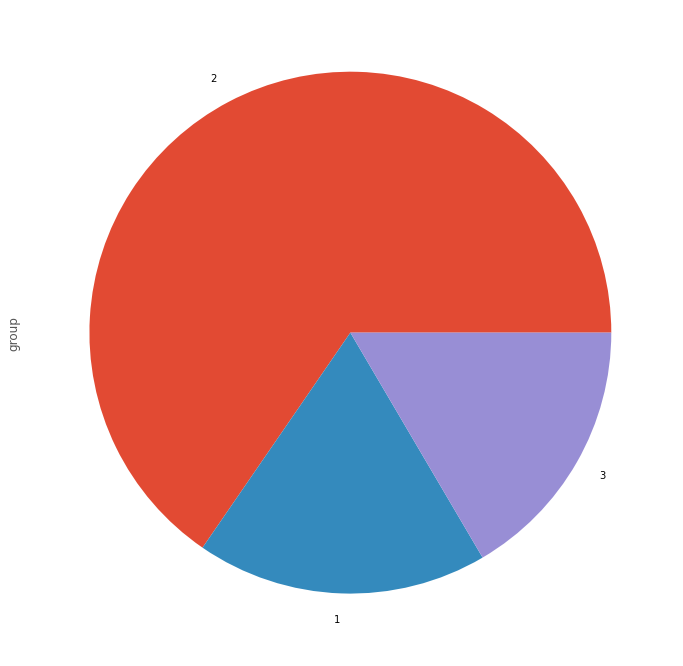

In [14]:
print(data.group.value_counts()/data.shape[0])
(data.group.value_counts()/data.shape[0]).plot(kind='pie')

In [8]:
data.describe()

,survival_time_hr,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,multi_sensor,group
count,133.000000,133.000000,133.000000,133.000000,133.000000,117.000000,121.000000,128.000000,130.00000,129.000000,133.000000
mean,21.795338,0.383459,62.413534,0.187970,0.228534,12.164769,4.763157,14.438125,1.37800,0.786202,1.984962
std,15.885313,0.488067,9.335601,0.392165,0.135864,7.370159,0.810013,5.018566,0.45185,0.225661,0.590133
min,0.030000,0.000000,23.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,1.000000
25%,6.000000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,2.000000
50%,22.000000,0.000000,62.000000,0.000000,0.217000,11.000000,4.650000,14.000000,1.21600,0.786000,2.000000
75%,33.000000,1.000000,68.000000,0.000000,0.280000,16.100000,5.300000,16.500000,1.50750,0.857000,2.000000
max,57.000000,1.000000,86.000000,1.000000,0.840000,40.000000,6.780000,39.000000,3.00000,2.000000,3.000000


In [11]:
data.columns

Index(['survival_time_hr', 'alive', 'age', 'pericardialeffusion',
       'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score',
       'wallmotion-index', 'multi_sensor', 'name', 'group'],
      dtype='object')

C:\Users\jaic208\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


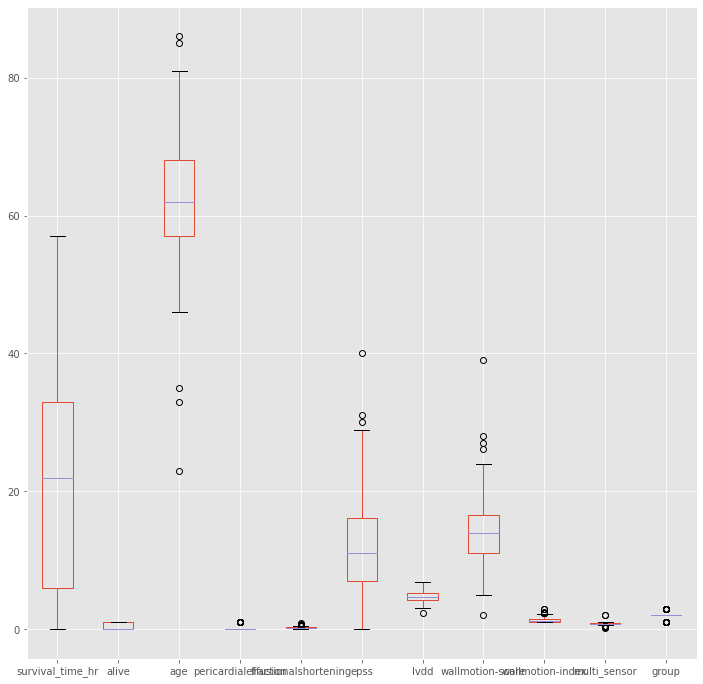

In [12]:
data[['survival_time_hr', 'alive', 'age', 'pericardialeffusion',
       'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score',
       'wallmotion-index', 'multi_sensor','group']].plot(kind='box')

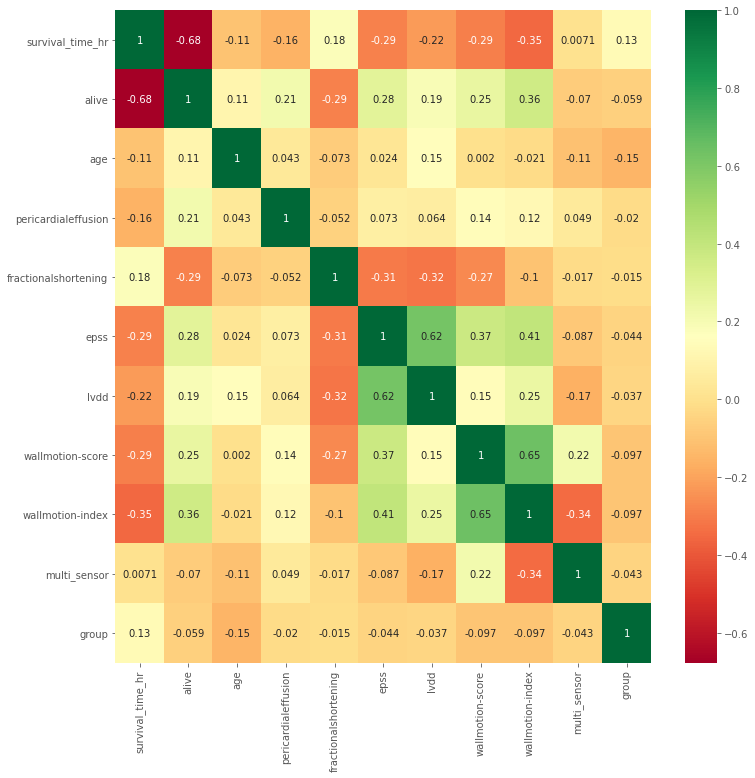

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [17]:
data.columns

Index(['survival_time_hr', 'alive', 'age', 'pericardialeffusion',
       'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score',
       'wallmotion-index', 'multi_sensor', 'name', 'group'],
      dtype='object')

In [27]:
# Survival time is referring to Time

T = data.survival_time_hr
T

0      11.0
1      19.0
2      16.0
3      57.0
4      19.0
       ... 
128     7.5
129    41.0
130    36.0
131    22.0
132    20.0
Name: survival_time_hr, Length: 133, dtype: float64

In [20]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

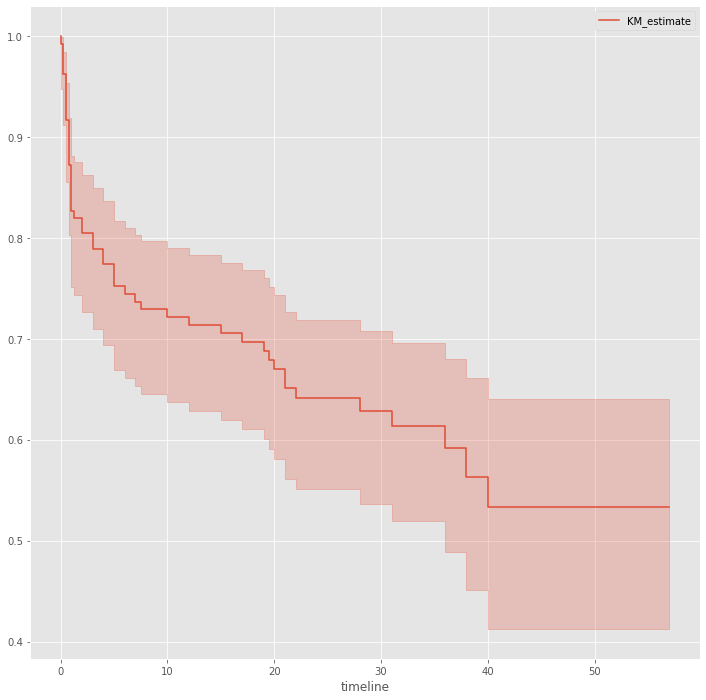

In [21]:
# Fitting our model

kmf.fit(T, event_observed=data.alive)
kmf.plot()

In [22]:
# Over Multiple groups

In [23]:
data.group.value_counts()

2    87
1    24
3    22
Name: group, dtype: int64

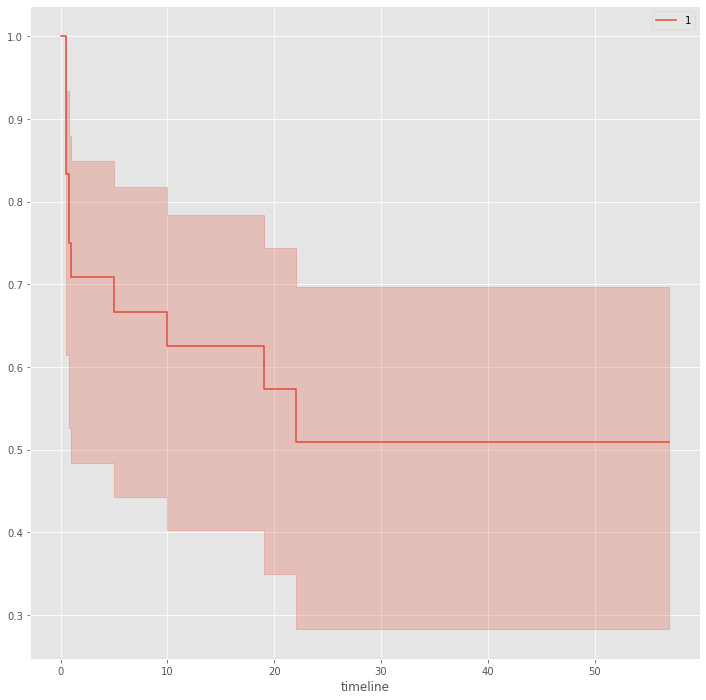

In [25]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[data.group==1],data.alive[data.group==1],label='1')
ax = kmf.plot()
ax

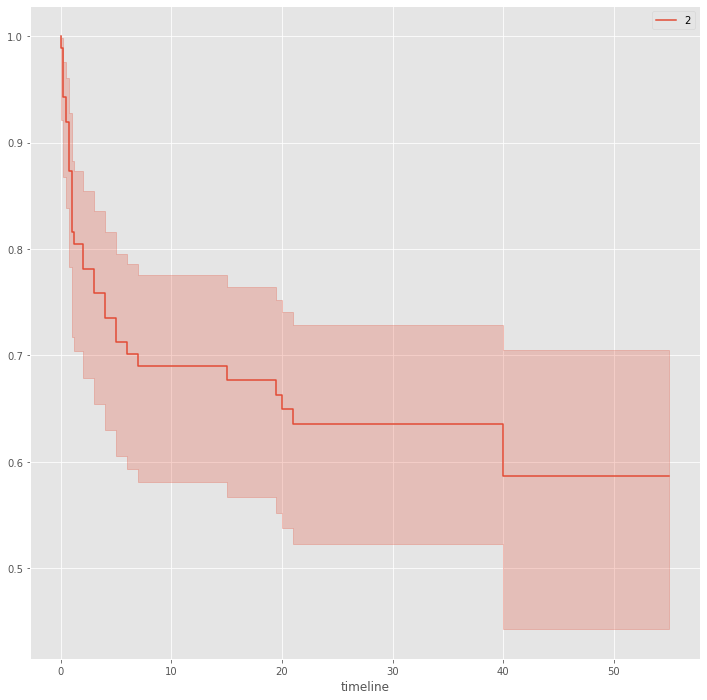

In [29]:
# Applying KaplanMeierFitter model on Time and Events for the group "2"
kmf.fit(T[data.group==2],data.alive[data.group==2],label='2')
kmf.plot()


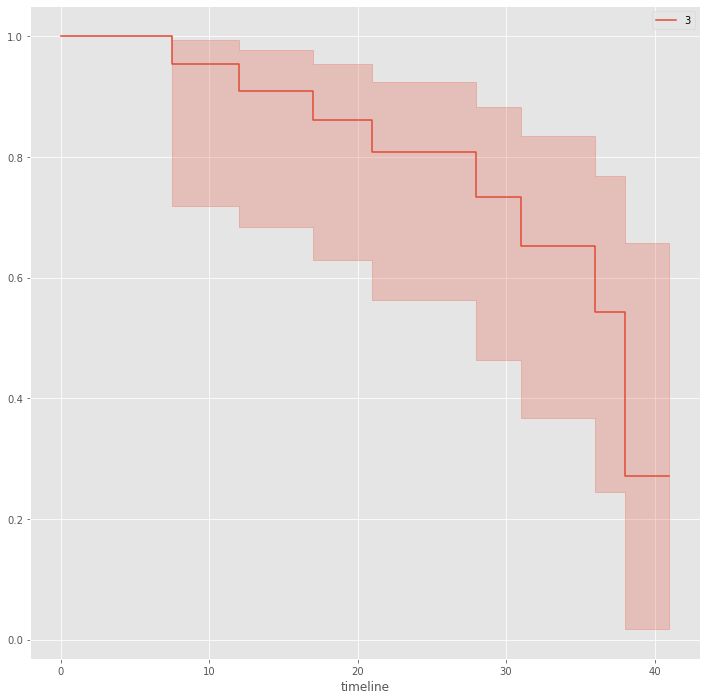

In [30]:
# Applying KaplanMeierFitter model on Time and Events for the group "3"
kmf.fit(T[data.group==3],data.alive[data.group==3],label='3')
kmf.plot()